In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
x = np.array(train.drop('label', axis=1))/255
y = np.array(train['label'])

In [5]:
x=x.reshape((-1,28,28,1))

In [6]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [7]:
data_gen = ImageDataGenerator(
            rotation_range=12,
            width_shift_range=0.12,
            height_shift_range=0.12,
            shear_range=0.12,
            validation_split=0.2,)

In [8]:
training_generator = data_gen.flow(x_train,y_train,batch_size=32,subset='training')
validation_generator = data_gen.flow(x_test,y_test,batch_size=32,subset='validation')

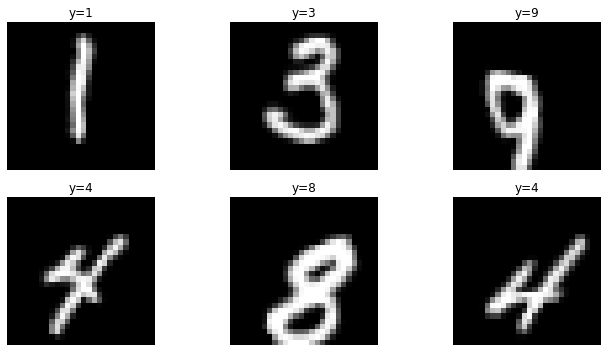

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    for x,y in training_generator:
        plt.imshow((x[0]/255).reshape(28,28),cmap='gray')
        plt.title('y={}'.format(y[0]))
        plt.axis('off')
        break
plt.tight_layout()
plt.show()

# Convolutional Neural Network

In [10]:
cnn = tf.keras.Sequential([
    
    layers.Conv2D(32,(3,3),input_shape=(28,28,1),padding='same',activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.3),
    
    layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    layers.BatchNormalization(),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.3),
    
    layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    layers.BatchNormalization(),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.3),
    
    layers.Conv2D(256,(3,3),activation='relu',padding='same'),
    layers.BatchNormalization(),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.5),
    
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10,activation='softmax')
])

In [11]:
cnn.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy']
           )

In [12]:
history_cnn = cnn.fit_generator(training_generator,epochs=100,validation_data=validation_generator)

Epoch 1/100
840/840 [==============================] - 14s 17ms/step - loss: 1.7449 - accuracy: 0.7235 - val_loss: 1.5320 - val_accuracy: 0.9345
Epoch 2/100
840/840 [==============================] - 15s 18ms/step - loss: 1.5493 - accuracy: 0.9174 - val_loss: 1.4894 - val_accuracy: 0.9732
Epoch 3/100
840/840 [==============================] - 14s 17ms/step - loss: 1.5295 - accuracy: 0.9347 - val_loss: 1.4858 - val_accuracy: 0.9756
Epoch 4/100
840/840 [==============================] - 15s 18ms/step - loss: 1.5187 - accuracy: 0.9453 - val_loss: 1.4804 - val_accuracy: 0.9798
Epoch 5/100
840/840 [==============================] - 13s 16ms/step - loss: 1.5121 - accuracy: 0.9506 - val_loss: 1.4855 - val_accuracy: 0.9750
Epoch 6/100
840/840 [==============================] - 13s 16ms/step - loss: 1.5090 - accuracy: 0.9537 - val_loss: 1.4807 - val_accuracy: 0.9804
Epoch 7/100
840/840 [==============================] - 16s 19ms/step - loss: 1.5037 - accuracy: 0.9587 - val_loss: 1.4803 - val_ac

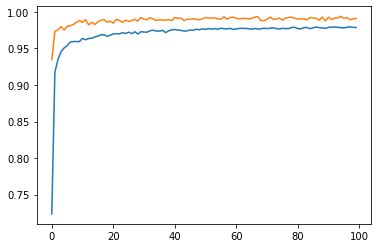

In [13]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])

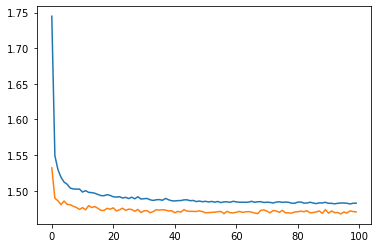

In [14]:
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])

In [15]:
cnn.evaluate( x_test, y_test)

263/263 [==============================] - 1s 4ms/step - loss: 1.4678 - accuracy: 0.9933


[1.46776282787323, 0.9933333396911621]

In [16]:
pred_test_data = np.array(test).reshape((-1,28,28,1))

In [17]:
predictions_cnn = cnn.predict_classes(pred_test_data)

In [18]:
submit_cnn = pd.DataFrame({'ImageId':range(1,len(predictions_cnn)+1),'Label':predictions_cnn})

submit_cnn.to_csv('submission_cnn.csv',index=False)
